Time series data analysis

In [ ]:
# mounting with google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from spacy.lang.en.stop_words import STOP_WORDS
nlp= spacy.load('en_core_web_lg')

#from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from IPython.display import display

# libraries for evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
# Importing the data

video_data = pd.read_csv("/content/drive/MyDrive/Project/eda_video.csv")
toy_data   = pd.read_csv("/content/drive/MyDrive/Project/eda_toy.csv")

In [ ]:
# first 2 rows
print("**************************** video_data ***************************************\n")
display(video_data.head(2))
print("**************************** Toy_data ***************************************\n")
display(toy_data.head(2))

**************************** video_data ***************************************



,Unnamed: 0,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A2HD75EMZR8QLN,0700099867,installing game struggle games windows live bu...,1,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,1,A3UR8NLLY1ZHCX,0700099867,like rally cars game funit oriented 34european...,4,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive


**************************** Toy_data ***************************************



,Unnamed: 0,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,1,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive


In [ ]:
# informartion about the data

video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            231780 non-null  int64  
 1   reviewerID            231780 non-null  object 
 2   asin                  231780 non-null  object 
 3   reviewText            231731 non-null  object 
 4   overall               231780 non-null  int64  
 5   reviewTime            231780 non-null  object 
 6   Reviews_orignal       231736 non-null  object 
 7   reviewText + summary  231780 non-null  object 
 8   reviewPolarity        231780 non-null  float64
 9   reviewAnalysis        231780 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 17.7+ MB


In [ ]:
# informartion about the data

toy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167597 entries, 0 to 167596
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            167597 non-null  int64  
 1   reviewerID            167597 non-null  object 
 2   asin                  167597 non-null  object 
 3   reviewText            167504 non-null  object 
 4   overall               167597 non-null  int64  
 5   reviewTime            167597 non-null  object 
 6   Reviews_orignal       167504 non-null  object 
 7   reviewText + summary  167597 non-null  object 
 8   reviewPolarity        167597 non-null  float64
 9   reviewAnalysis        167597 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 12.8+ MB


In [ ]:
# changing index column
video_data["reviewTime"] = pd.to_datetime(video_data["reviewTime"])
toy_data["reviewTime"] = pd.to_datetime(toy_data["reviewTime"])

In [ ]:
print("Shape of the video_data data = ",video_data.shape)
print("\nShape of the toy_data data = ",toy_data.shape)

Shape of the video_data data =  (231780, 10)

Shape of the toy_data data =  (167597, 10)


In [ ]:
# describe about the data

video_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,231780.0,115889.500000,66909.267034,0.0,57944.750000,115889.5000,173834.250000,231779.0
overall,231780.0,4.086397,1.202330,1.0,4.000000,5.0000,5.000000,5.0
reviewPolarity,231780.0,0.104190,0.202022,-1.0,-0.007905,0.0875,0.201389,1.0


In [ ]:
# describe about the data

video_data.describe(include='object')

,reviewerID,asin,reviewText,Reviews_orignal,reviewText + summary,reviewAnalysis
count,231780,231780,231731,231736,231780,231780
unique,24303,10672,231244,231673,231758,4
top,A3V6Z4RCDGRC44,B00BGA9WK2,great game,Great game,Great game Five Stars,Positive
freq,773,802,21,7,4,158245


In [ ]:
# describe about the data

video_data.describe(include='object')

,reviewerID,asin,reviewText,Reviews_orignal,reviewText + summary,reviewAnalysis
count,231780,231780,231731,231736,231780,231780
unique,24303,10672,231244,231673,231758,4
top,A3V6Z4RCDGRC44,B00BGA9WK2,great game,Great game,Great game Five Stars,Positive
freq,773,802,21,7,4,158245


In [ ]:
# describe about the data

toy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,167597.0,83798.000000,48381.230870,0.0,41899.000000,83798.000000,125697.00,167596.0
overall,167597.0,4.356307,0.993501,1.0,4.000000,5.000000,5.00,5.0
reviewPolarity,167597.0,0.225415,0.209805,-1.0,0.094444,0.213294,0.35,1.0


In [ ]:
# describe about the data

toy_data.describe(include='object')

,reviewerID,asin,reviewText,Reviews_orignal,reviewText + summary,reviewAnalysis
count,167597,167597,167504,167504,167597,167597
unique,19412,11924,167208,167489,167589,4
top,AJGU56YG8G1DQ,B004S8F7QM,cute,love it,nice Five Stars,Positive
freq,550,309,9,3,3,132089


In [ ]:
# Checking for null values
video_data.isnull().sum()

Unnamed: 0               0
reviewerID               0
asin                     0
reviewText              49
overall                  0
reviewTime               0
Reviews_orignal         44
reviewText + summary     0
reviewPolarity           0
reviewAnalysis           0
dtype: int64

In [ ]:
# Checking for null values
toy_data.isnull().sum()

Unnamed: 0               0
reviewerID               0
asin                     0
reviewText              93
overall                  0
reviewTime               0
Reviews_orignal         93
reviewText + summary     0
reviewPolarity           0
reviewAnalysis           0
dtype: int64

In [ ]:
# Dropping the null values

video_data.dropna(inplace=True)
toy_data.dropna(inplace=True)

In [ ]:
polarity_score_video=pd.DataFrame(video_data[video_data["reviewPolarity"]>0])
polarity_score_video.shape

(166446, 10)

In [ ]:
polarity_score_toy=pd.DataFrame(toy_data[toy_data["reviewPolarity"]>0])
polarity_score_toy.shape

(146309, 10)

In [ ]:
# Mode of Product_Id for video and toy data

print("For Video_Data Maximum Repetead Product_Id : ",polarity_score_video["asin"].mode().values)
print("\nFor Toy_Data Maximum Repetead Product_Id : ",polarity_score_toy["asin"].mode().values)

For Video_Data Maximum Repetead Product_Id :  ['B00BGA9WK2']

For Toy_Data Maximum Repetead Product_Id :  ['B0089RPUHO']


In [ ]:
# printing column names
print("**************************** video_data ***************************************\n")
display(polarity_score_video.columns)
print("**************************** Toy_data ***************************************\n")
display(polarity_score_toy.columns)

**************************** video_data ***************************************



Index(['Unnamed: 0', 'reviewerID', 'asin', 'reviewText', 'overall',
       'reviewTime', 'Reviews_orignal', 'reviewText + summary',
       'reviewPolarity', 'reviewAnalysis'],
      dtype='object')

**************************** Toy_data ***************************************



Index(['Unnamed: 0', 'reviewerID', 'asin', 'reviewText', 'overall',
       'reviewTime', 'Reviews_orignal', 'reviewText + summary',
       'reviewPolarity', 'reviewAnalysis'],
      dtype='object')

In [ ]:
polarity_score_video.drop("Unnamed: 0",axis=1,inplace=True)
polarity_score_toy.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
polarity_score_video.set_index(np.arange(0,len(polarity_score_video)),inplace=True)
polarity_score_toy.set_index(np.arange(0,len(polarity_score_toy)),inplace=True)

In [ ]:
# first 2 rows
print("**************************** video_data ***************************************\n")
display(polarity_score_video.head(2))
print("**************************** Toy_data ***************************************\n")
display(polarity_score_toy.head(2))

**************************** video_data ***************************************



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A3UR8NLLY1ZHCX,0700099867,like rally cars game funit oriented 34european...,4,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive
1,A361M14PU2GUEG,0700099867,dirt 2 xbox 360 okay game started playing game...,4,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...,0.233766,Positive


**************************** Toy_data ***************************************



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive
1,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.300000,Positive


In [ ]:
#  Video Games Data

from collections import Counter 
l = polarity_score_video[(polarity_score_video["asin"]=="B00BGA9WK2")]
product_names = []
review = []
c=1
for j in l.reviewText.unique():
#for j in l["asin"]:
    review.append(j)
    product=[]
    count=[]
    d=l[l['reviewText']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
            if w.label_=='ORG':
              count.append(w.text)           
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_names.append(a)
    
    c+=1

In [ ]:
print("product name for a particular Product_ID  : B00BGA9WK2\n")
t = pd.DataFrame({"Product Name":product_names })["Product Name"].value_counts()
for i in t.index:
  print("(",i,")",end =",")

product name for a particular Product_ID  : B00BGA9WK2

( Sony ),( Amazon ),( xbox ),( Killzone ),( Xbox ),( PSN ),( Netflix ),( PS ),( sony ),( BF4 ),( Vita ),( amazon ),( PlayStation ),( Playstation ),( Xbox One ),( the PlayStation 4 ),( PlayStation 4 ),( DS3 ),( Playstation Plus ),( the Playstation 4 ),( UPS ),( Facebook ),( The Playstation 4 ),( NBA ),( FIFA ),( Xbox 360 ),( netflix ),( SONY ),( PS Plus ),( youtube ),( DOA ),( E3 ),( usb ),( Nintendo ),( Assassin's Creed ),( Seagate ),( AC4 ),( Microsoft ),( the Dualshock 3 ),( atm ),( The Dualshock 4 ),( xbox one ),( MLB ),( XB1 ),( Music Unlimited ),( WOW ),( Samsung ),( X1 ),( Playstation 3 ),( The PlayStation 4 ),( the Wii U ),( Playstation 4 ),( ac ),( killzone ),( Awesome ),( eghhhh ),( Original ),( NEXT ),( the PS Vita ),( Fifa 49 ),( procesor ),( Working PS4 ),( wal mart ),( Instaed ),( Hardware ),( BRICKED ),( a Playstation 4 ),( ps3 suckBuy ),( Knack, Lego Marvel Super Heroes ),( the Dualshock 4 ),( Share ),( Next Gen Typ

Assassin's Creed,AC4 ,Knack, Lego Marvel Super Heroes,KillZone,Kudos,fifa,Kingdom Hearts 3,Witcher3   and Tomb Raider- Definitive Edition  are few video games for the product id B00BGA9WK2 .

In [ ]:
#  toy Games Data

from collections import Counter 

l = polarity_score_toy[(polarity_score_toy["asin"]=="B0089RPUHO")]
product_names = []
review = []
c=1
for j in l.reviewText.unique():
#for j in l["reviewText + summary"]:
    review.append(j)
    product=[]
    count=[]
    d=l[l['reviewText']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
            #if w.label_=='ORG':
              #count.append(w.text)  
                     
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_names.append(a)
    
    c+=1

In [ ]:
print("product name for a particular Product_ID  : B0089RPUHO\n")
t = pd.DataFrame({"Product Name":product_names })["Product Name"].value_counts()
for i in t.index:
  print("(",i,")",end =",")

product name for a particular Product_ID  : B0089RPUHO

( LeapPad ),( LeapFrog ),( Leapfrog ),( iPad ),( leappad ),( Leappad ),( Leap Pad 2 ),( Amazon ),( Monsters University ),( the LeapPad 2 ),( amazon ),( Mom & Dad ),( Explorer ),( Leap Pad ),( ipad ),( Ipad ),( LeapPad 2 ),( Kindle ),( Leappad 1 ),( Leap Frog ),( reading).Well ),( peppier ),( LeapPAD2 ),( Great price & Quality ),( AA ),( LeapFrog LeapPad2 ),( Amazon.com ),( epad ),( the LeapPad 2 Monsters University Varsity Edition Bundle ),( Leap ),( this Leap Pad ),( toybox ),( leapfrog2 ),( LeapPad. ),( Monster U ),( leappad 2 ),( iPod ),( FRONT ),( Umizoomi ),( the Leap Pads ),( Pre School ),( Fire HD ),( withit ),( Pencil ),( LeapFrog LeapPad2 Disney/Pixar Monsters University Varsity Edition ),( Great Service ),( Ultra ),( Monsters Inc. ),( Leappad 2 ),( Monsters ),( a Kindle Fire ),( tablets&#34 ),( the Leap Pad ),( Explorers ),( AC ),( HS Physics ),( ABC ),( the Original leappad ),( Nexus ),( LeapFrog Connect ),( Apps ),( le

LeapFrog,Monsters University,Roly Poly are the toys are few product names for product id B0089RPUHO .

In [ ]:
# Creating dataframe with positive sentiment and particular Product_Id 

video_data_copy= polarity_score_video[(polarity_score_video["asin"]=="B00BGA9WK2")].copy()
toy_data_copy= polarity_score_toy[(polarity_score_toy["asin"]=="B0089RPUHO")].copy()

In [ ]:
polarity_score_video.set_index('reviewTime',inplace=True)

In [ ]:
polarity_score_toy.set_index('reviewTime',inplace=True)

In [ ]:
print("Shape of the new video data :",video_data_copy.shape)
print("\nShape of the new toy data :",toy_data_copy.shape)

Shape of the new video data : (722, 9)

Shape of the new toy data : (231, 9)


In [ ]:
# first 2 rows
print("**************************** video_data ***************************************\n")
display(video_data_copy.head(2))
print("**************************** Toy_data ***************************************\n")
display(toy_data_copy.head(2))

**************************** video_data ***************************************



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
154683,A3OQ3DU03L2GGO,B00BGA9WK2,simply amazing huge step ps3 huge step xbox be...,5,2013-12-01,Simply amazing. A huge step up from the PS3 an...,Simply amazing. A huge step up from the PS3 an...,0.475000,Positive
154684,A3H99DFEG68SR,B00BGA9WK2,ive ps4 launch graphics amazing led samsung sy...,3,2014-03-21,So I've had the PS4 since launch and I have to...,So I've had the PS4 since launch and I have to...,0.208262,Positive


**************************** Toy_data ***************************************



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
114078,A3EC1KT7IVB4MY,B0089RPUHO,team leappad way 9 year old son playing leap p...,4,2014-05-06,Team LeapPad all the way! My 9 year old son i...,Team LeapPad all the way! My 9 year old son i...,0.037500,Positive
114079,A2DURJRPTPKUZS,B0089RPUHO,kids leapfrog leapster leappad products honest...,5,2012-12-19,My kids own all of the LeapFrog Leapster and L...,My kids own all of the LeapFrog Leapster and L...,0.397159,Positive


In [ ]:
# checking for null values

video_data_copy.isnull().sum()

reviewerID              0
asin                    0
reviewText              0
overall                 0
reviewTime              0
Reviews_orignal         0
reviewText + summary    0
reviewPolarity          0
reviewAnalysis          0
dtype: int64

In [ ]:
# checking for null values

toy_data_copy.isnull().sum()

reviewerID              0
asin                    0
reviewText              0
overall                 0
reviewTime              0
Reviews_orignal         0
reviewText + summary    0
reviewPolarity          0
reviewAnalysis          0
dtype: int64

In [ ]:
# creating dataframe with only overall column

video_data_copy_df = video_data_copy[["overall","reviewTime","reviewPolarity"]]
toy_data_copy_df =  toy_data_copy[["overall","reviewTime","reviewPolarity"]]


video_data_copy_df = video_data_copy.copy()
toy_data_copy_df = toy_data_copy.copy()


In [ ]:
video_data_copy_df.set_index("reviewTime",inplace=True)
toy_data_copy_df.set_index("reviewTime",inplace=True)


In [ ]:
# Resempling data weekly

video_data_copy_df = video_data_copy_df.resample("W").mean()

toy_data_copy_df = toy_data_copy_df.resample("W").mean()

In [ ]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]        # To get P_value it is in 1st index at output
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [ ]:
 # LJung-Box test (model testeing)
def test(model):
    pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Reject H0. Bad model")
    else:
        print("Fail-to-Reject H0. Good model")

In [ ]:
 # function for AutoCorrelation and Partial AutoCorrelation plot
    # p -> ACF (auto correlation graph)
    # q -> PACF (partial autocorrelation graph)
    # d -> differential level (from top)

def acf_pacf1(data,l):

    fig = plt.figure(figsize= (8, 6) )

    #Show ACF

    ax1=fig.add_subplot(211)

    sm.graphics.tsa.plot_acf(data, lags = l, ax = ax1 )

    # Show PACF

    ax2=fig.add_subplot(212)

    sm.graphics.tsa.plot_pacf(data, lags = l, ax = ax2 )

    plt.tight_layout()

In [ ]:
 # split the data into train and test 

index = int(len(video_data_copy_df)*.8) # 80 - 20 split

train_df1 = video_data_copy_df.iloc[:index] 

test_df1 = video_data_copy_df.iloc[index:] 

train1 = train_df1[["reviewPolarity"]]
test1 = test_df1[["reviewPolarity"]] 
print("train= {}, test = {}".format(len(train1), len(test1)))

train= 59, test = 15


In [ ]:
# imputing null values by median
video_data_copy_df.fillna(train1.median(),inplace=True)
train1.fillna(train1.median(),inplace=True)
test1.fillna(test1.median(),inplace=True)

### Video_data

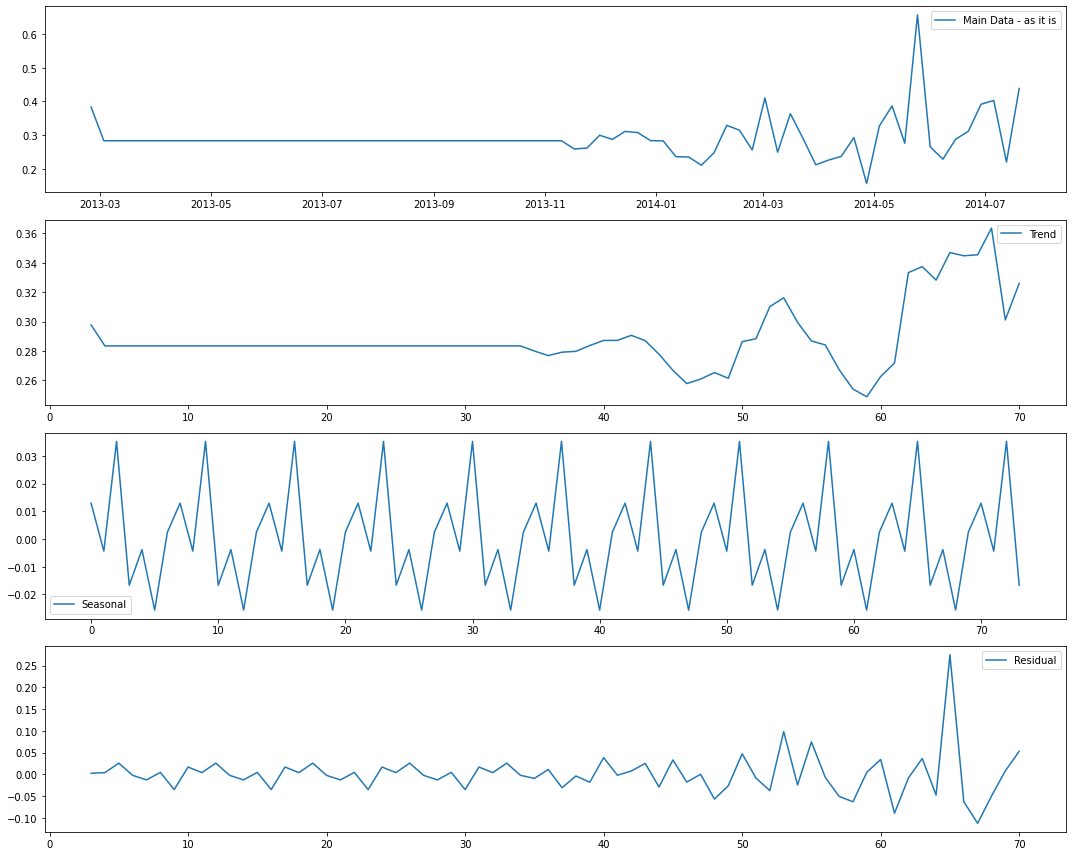

In [ ]:
# different components of the Time series data

decomposition=seasonal_decompose(np.asarray(video_data_copy_df["reviewPolarity"]), period=7)  # colab
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(15,12))

# Original data
plt.subplot(411)
plt.plot(video_data_copy_df["reviewPolarity"],label='Main Data - as it is')
plt.legend(loc='best')

# Trend
plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

# Residual
plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

# Plot all
plt.tight_layout()

We can see that the data has trend and seasonality.

In [ ]:
# check the data for stationarity(main data)
print(checkStationarity(train1))

p-value=3.003640857138772e-05. Data is stationary


Data is not Stationary.

In [ ]:
lag=train1-train1.diff(7)
lag.dropna(inplace=True)

In [ ]:
# check the data for stationarity(main data)
print(checkStationarity(lag))

p-value=3.363177123599297e-11. Data is stationary


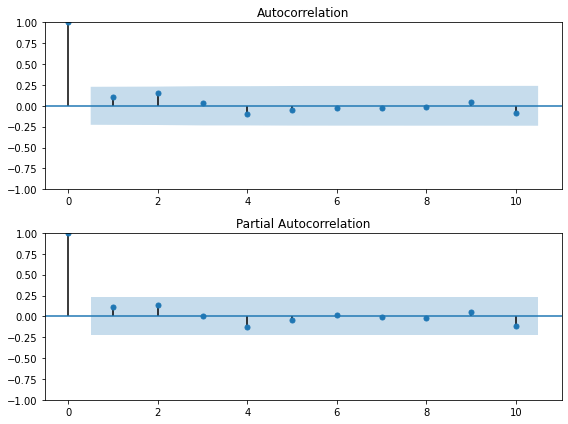

In [ ]:
# AutoCorrelation and partial AutoCorrelation plot
acf_pacf1(lag,10)

##### ARIMA Model

In [ ]:
## making dataframe for best p and q values by using AIC values 
import warnings
warnings.filterwarnings("ignore")

k = [];l = [];m = [];n = [];o =[];y=[]
for p in range(2,3):
    for q in range(3,4):
      for d in range(1,3):
        m1 = ARIMA(train1,order=(p,d,q)).fit()
        k.append (p)
        l.append (q)
        y.append (d)
        m.append (m1.aic)
        n.append (m1.bic)
        o.append (m1.hqic)

ii_df1 = pd.DataFrame({"p value":k,"d value":y,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [ ]:
  # finding lowest values of AIC and show that row

ii_df1[ii_df1["AIC values"]==np.min(ii_df1["AIC values"])]

,p value,d value,q value,AIC values,BIC values,HQIC values
0,2,1,3,-90.300439,-76.008279,-84.570303


In [ ]:
 # Arma Model where p,q and d
arima_model = ARIMA(train1,order=(2,1,3)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:         reviewPolarity   No. Observations:                   81
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  51.150
Date:                Thu, 05 Jan 2023   AIC                            -90.300
Time:                        10:07:01   BIC                            -76.008
Sample:                    07-29-2012   HQIC                           -84.570
                         - 02-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0205      0.567     -0.036      0.971      -1.131       1.090
ar.L2         -0.4287      0.660     -0.650      0.516      -1.722       0.864
ma.L1         -0.9115      0.650     -1.401      0.1

In [ ]:
 # forecasts sales by using the Model
forecasts1 = arima_model.forecast(len(test1))
print(forecasts1)

2014-02-16    0.285555
2014-02-23    0.256925
2014-03-02    0.295174
2014-03-09    0.306663
2014-03-16    0.290029
2014-03-23    0.285444
2014-03-30    0.292670
2014-04-06    0.294487
2014-04-13    0.291352
2014-04-20    0.290637
2014-04-27    0.291996
2014-05-04    0.292275
2014-05-11    0.291687
2014-05-18    0.291579
2014-05-25    0.291834
2014-06-01    0.291874
2014-06-08    0.291765
2014-06-15    0.291749
2014-06-22    0.291797
2014-06-29    0.291802
2014-07-06    0.291782
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [ ]:
 # actual vs predicted values(test)
actual = []; forcast = []

for i in range(len(forecasts1)):
    actual.append(test1["reviewPolarity"][i])
    forcast.append(forecasts1[i])

df_res1 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test1.index)
df_res1['err'] = df_res1.actual - df_res1.forcasted
print(df_res1)

              actual  forcasted       err
reviewTime                               
2014-02-16  0.462949   0.285555  0.177394
2014-02-23  0.257500   0.256925  0.000575
2014-03-02  0.334091   0.295174  0.038917
2014-03-09  0.308712   0.306663  0.002049
2014-03-16  0.346875   0.290029  0.056846
2014-03-23  0.308712   0.285444  0.023268
2014-03-30  0.077588   0.292670 -0.215082
2014-04-06  0.308712   0.294487  0.014225
2014-04-13  0.308712   0.291352  0.017360
2014-04-20  0.308712   0.290637  0.018075
2014-04-27  0.308712   0.291996  0.016716
2014-05-04  0.308712   0.292275  0.016437
2014-05-11  0.037500   0.291687 -0.254187
2014-05-18  0.308712   0.291579  0.017133
2014-05-25  0.308712   0.291834  0.016878
2014-06-01  0.308712   0.291874  0.016838
2014-06-08  0.308712   0.291765  0.016948
2014-06-15  0.308712   0.291749  0.016963
2014-06-22  0.283333   0.291797 -0.008463
2014-06-29  0.308712   0.291802  0.016910
2014-07-06  0.500000   0.291782  0.208218


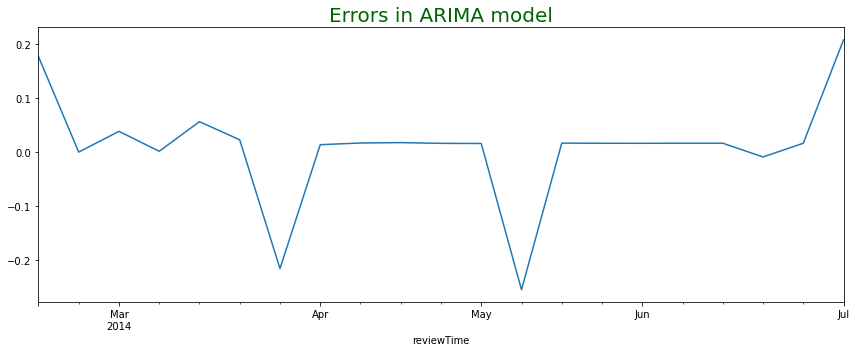

In [ ]:
# errors for ARIMA model
fig,ax1 = plt.subplots(1,1,figsize=(12,5))
plt.title("Errors in ARIMA model",size = 20,color="darkgreen")
df_res1.err.plot(ax =ax1)
plt.show()

In [ ]:
# checking the model is good or bad 
test(arima_model)

Fail-to-Reject H0. Good model


In [ ]:
 # calculating the errors(ARIMA) 
# low mse and rmse is good for the model

p=2;q=3;d=1
msg1 = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res1.actual, df_res1.forcasted)
print(msg1 + "\n\tMSE = {}\n\tRMSE = {}".format(round(mse1,2),round(np.sqrt(mse1),2)))

ARIMA Model. Order=(2,1,3)
	MSE = 0.01
	RMSE = 0.1


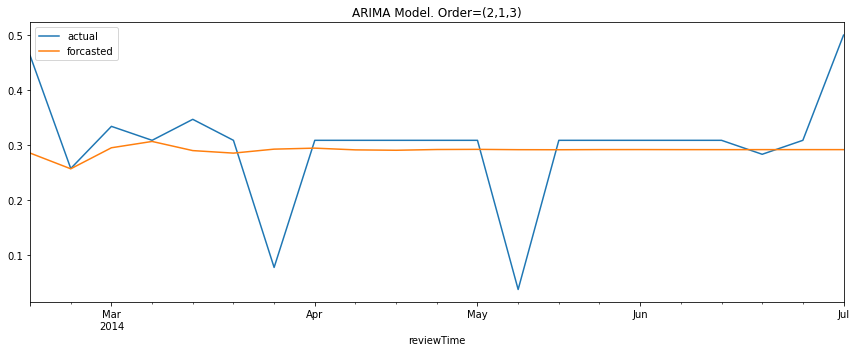

In [ ]:
# Plot actual vs. predicted values(test)

df_res1.actual.plot(figsize=(12,5),legend=True)
df_res1.forcasted.plot(legend=True)
plt.title(msg1)
plt.show()

In [ ]:
# build model

arima_model1 = ARIMA(video_data_copy_df["reviewPolarity"], order=(2,1,3)).fit()

In [ ]:

# Forecasting the values (video data)

stop= 52
forecasted_values1 = arima_model1.forecast(stop)
print(forecasted_values1)

2014-07-27    0.247638
2014-08-03    0.308547
2014-08-10    0.308114
2014-08-17    0.250515
2014-08-24    0.340221
2014-08-31    0.256261
2014-09-07    0.300597
2014-09-14    0.312190
2014-09-21    0.251802
2014-09-28    0.334325
2014-10-05    0.264168
2014-10-12    0.293979
2014-10-19    0.314884
2014-10-26    0.253957
2014-11-02    0.328408
2014-11-09    0.271280
2014-11-16    0.288614
2014-11-23    0.316396
2014-11-30    0.256745
2014-12-07    0.322639
2014-12-14    0.277556
2014-12-21    0.284405
2014-12-28    0.316918
2015-01-04    0.259963
2015-01-11    0.317151
2015-01-18    0.282985
2015-01-25    0.281239
2015-02-01    0.316632
2015-02-08    0.263435
2015-02-15    0.312042
2015-02-22    0.287583
2015-03-01    0.278998
2015-03-08    0.315706
2015-03-15    0.267014
2015-03-22    0.307380
2015-03-29    0.291387
2015-04-05    0.277562
2015-04-12    0.314294
2015-04-19    0.270577
2015-04-26    0.303207
2015-05-03    0.294447
2015-05-10    0.276810
2015-05-17    0.312532
2015-05-24 

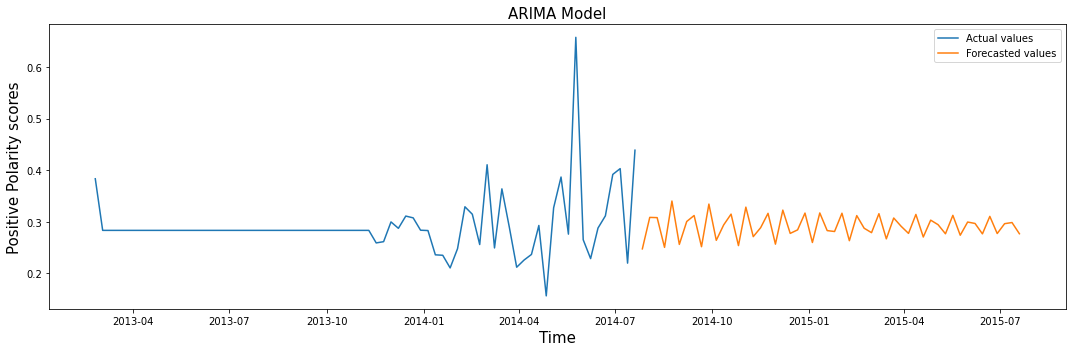

In [ ]:
 # plotting given data and forecasted values
 
fig,ax1=plt.subplots(1,1,figsize=(15,5))
plt.plot(video_data_copy_df["reviewPolarity"],label="Actual values")
plt.plot(forecasted_values1,label="Forecasted values")
plt.ylabel("Positive Polarity scores",size = 15)
plt.xlabel("Time",size = 15)
plt.legend()
plt.title("ARIMA Model",size=15)
plt.show()

##### SARIMA

In [ ]:
## making dataframe for best p and q values by using AIC values 
import warnings
warnings.filterwarnings("ignore")

k = [];l = [];m = [];n = [];o =[];y=[]
for p in range(2,5):
    for q in range(3,5):
      for d in range(1,3):
        m2 = SARIMAX(train1, order=(p,d,q), seasonal_order=(p,d,q,7)).fit()
        k.append (p)
        l.append (q)
        y.append (d)
        m.append (m2.aic)
        n.append (m2.bic)
        o.append (m2.hqic)

ii_df2 = pd.DataFrame({"p value":k,"d value":y,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [ ]:
  # finding lowest values of AIC and show that row

ii_df2[ii_df2["AIC values"]==np.min(ii_df2["AIC values"])]

,p value,d value,q value,AIC values,BIC values,HQIC values
0,2,1,3,-52.223421,-27.028367,-42.182757


In [ ]:
# build model

sarima_model = SARIMAX(train1, order=(2,1,3), seasonal_order=(2,1,3,7)).fit()

In [ ]:
# forecasts sales by using the Model

forecasts2 = sarima_model.forecast(len(test1))
print(forecasts2)

2014-02-16    0.308523
2014-02-23    0.237063
2014-03-02    0.223873
2014-03-09    0.316085
2014-03-16    0.321108
2014-03-23    0.404749
2014-03-30    0.192433
2014-04-06    0.334510
2014-04-13    0.261114
2014-04-20    0.240564
2014-04-27    0.341716
2014-05-04    0.324050
2014-05-11    0.401631
2014-05-18    0.187982
2014-05-25    0.348478
2014-06-01    0.262868
2014-06-08    0.232005
2014-06-15    0.327451
2014-06-22    0.316013
2014-06-29    0.396527
2014-07-06    0.189220
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [ ]:

 # actual vs predicted values(test)
actual = []; forcast = []

for i in range(len(forecasts2)):
    actual.append(test1["reviewPolarity"][i])
    forcast.append(forecasts2[i])

df_res2 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test1.index)
df_res2['err'] = df_res2.actual - df_res2.forcasted
print(df_res2)

              actual  forcasted       err
reviewTime                               
2014-02-16  0.462949   0.308523  0.154426
2014-02-23  0.257500   0.237063  0.020437
2014-03-02  0.334091   0.223873  0.110218
2014-03-09  0.308712   0.316085 -0.007372
2014-03-16  0.346875   0.321108  0.025767
2014-03-23  0.308712   0.404749 -0.096037
2014-03-30  0.077588   0.192433 -0.114844
2014-04-06  0.308712   0.334510 -0.025798
2014-04-13  0.308712   0.261114  0.047598
2014-04-20  0.308712   0.240564  0.068148
2014-04-27  0.308712   0.341716 -0.033003
2014-05-04  0.308712   0.324050 -0.015338
2014-05-11  0.037500   0.401631 -0.364131
2014-05-18  0.308712   0.187982  0.120730
2014-05-25  0.308712   0.348478 -0.039765
2014-06-01  0.308712   0.262868  0.045844
2014-06-08  0.308712   0.232005  0.076708
2014-06-15  0.308712   0.327451 -0.018739
2014-06-22  0.283333   0.316013 -0.032679
2014-06-29  0.308712   0.396527 -0.087815
2014-07-06  0.500000   0.189220  0.310780


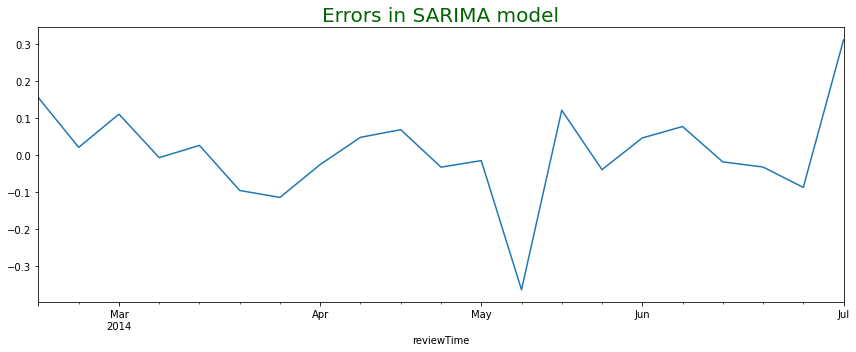

In [ ]:
# errors for SARIMA model 

fig,ax1 = plt.subplots(1,1,figsize=(12,5))
plt.title("Errors in SARIMA model",size = 20,color="darkgreen")
df_res2.err.plot(ax =ax1)
plt.show()

In [ ]:
# checking the model is good or bad 
test(sarima_model)

Fail-to-Reject H0. Good model


In [ ]:
 # calculating the errors(SARIMA) 
# low mse and rmse is good for the model

p=2;q=3;d=1
msg2 = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse2 = mean_squared_error(df_res2.actual, df_res2.forcasted)
print(msg2 + "\n\tMSE = {}\n\tRMSE = {}".format(round(mse2,2),round(np.sqrt(mse2),1)))

SARIMA Model. Order=(2,1,3)
	MSE = 0.02
	RMSE = 0.1


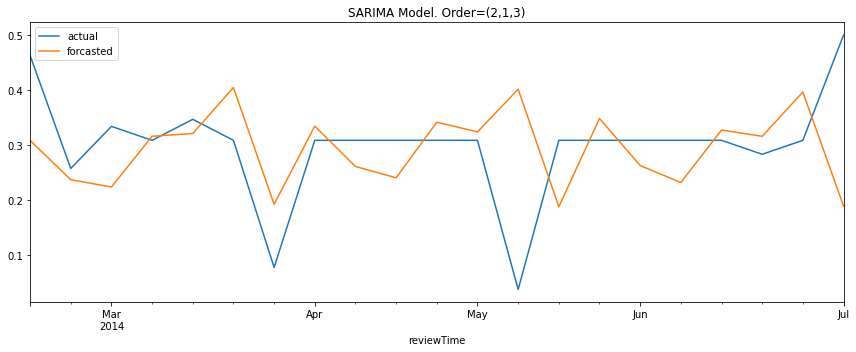

In [ ]:
# Plot actual vs. predicted values(test)

df_res2.actual.plot(figsize=(12,5),legend=True)
df_res2.forcasted.plot(legend=True)
plt.title(msg2)
plt.show()

In [ ]:
# build model

sarima_model1 = SARIMAX(video_data_copy_df["reviewPolarity"], order=(1,1,3), seasonal_order=(2,1,3,7)).fit()

In [ ]:
# Forecasting the values (video data)

stop= 52
forecasted_values2 = sarima_model1.forecast(stop)
print(forecasted_values2)

2014-07-27    0.414058
2014-08-03    0.259343
2014-08-10    0.403882
2014-08-17    0.355357
2014-08-24    0.319627
2014-08-31    0.464064
2014-09-07    0.296248
2014-09-14    0.345077
2014-09-21    0.284158
2014-09-28    0.379135
2014-10-05    0.432699
2014-10-12    0.369263
2014-10-19    0.483615
2014-10-26    0.380470
2014-11-02    0.376408
2014-11-09    0.310263
2014-11-16    0.413759
2014-11-23    0.437593
2014-11-30    0.404871
2014-12-07    0.445427
2014-12-14    0.413816
2014-12-21    0.414947
2014-12-28    0.327936
2015-01-04    0.440839
2015-01-11    0.456168
2015-01-18    0.412127
2015-01-25    0.506423
2015-02-01    0.413550
2015-02-08    0.424146
2015-02-15    0.352194
2015-02-22    0.456632
2015-03-01    0.485119
2015-03-08    0.440393
2015-03-15    0.519093
2015-03-22    0.447224
2015-03-29    0.450537
2015-04-05    0.374172
2015-04-12    0.481686
2015-04-19    0.503882
2015-04-26    0.462469
2015-05-03    0.537568
2015-05-10    0.467738
2015-05-17    0.473307
2015-05-24 

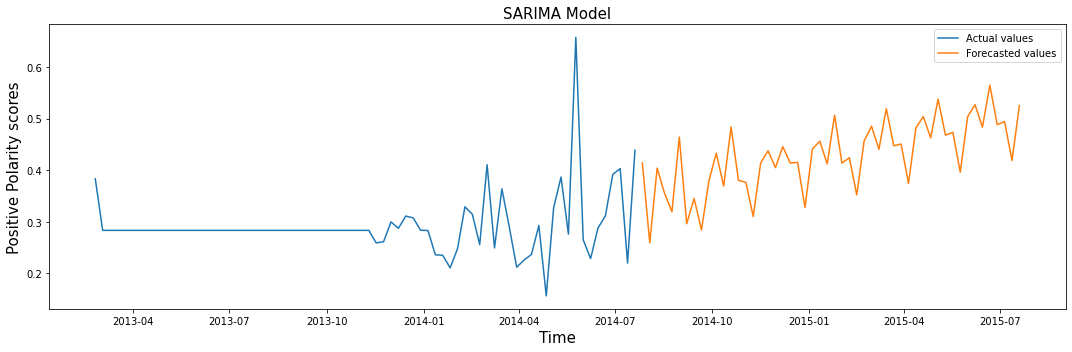

In [ ]:
 # plotting given data and forecasted values
 
fig,ax1=plt.subplots(1,1,figsize=(15,5))
plt.plot(video_data_copy_df["reviewPolarity"],label="Actual values")
plt.plot(forecasted_values2,label="Forecasted values")
plt.ylabel("Positive Polarity scores",size = 15)
plt.xlabel("Time",size = 15)
plt.title("SARIMA Model",size=15)
plt.legend()
plt.show()

### Toy Data

In [ ]:
 # split the data into train and test 

index = int(len(toy_data_copy_df)*.8) # 80 - 20 split

train_df1 = toy_data_copy_df.iloc[:index] 

test_df1 = toy_data_copy_df.iloc[index:] 

train1 = train_df1[["reviewPolarity"]]
test1 = test_df1[["reviewPolarity"]] 
print("train= {}, test = {}".format(len(train1), len(test1)))

train= 81, test = 21


In [ ]:
# Imputing missing values

toy_data_copy_df.fillna(train1.median(),inplace=True)
train1.fillna(train1.median(),inplace=True)
test1.fillna(test1.median(),inplace=True)


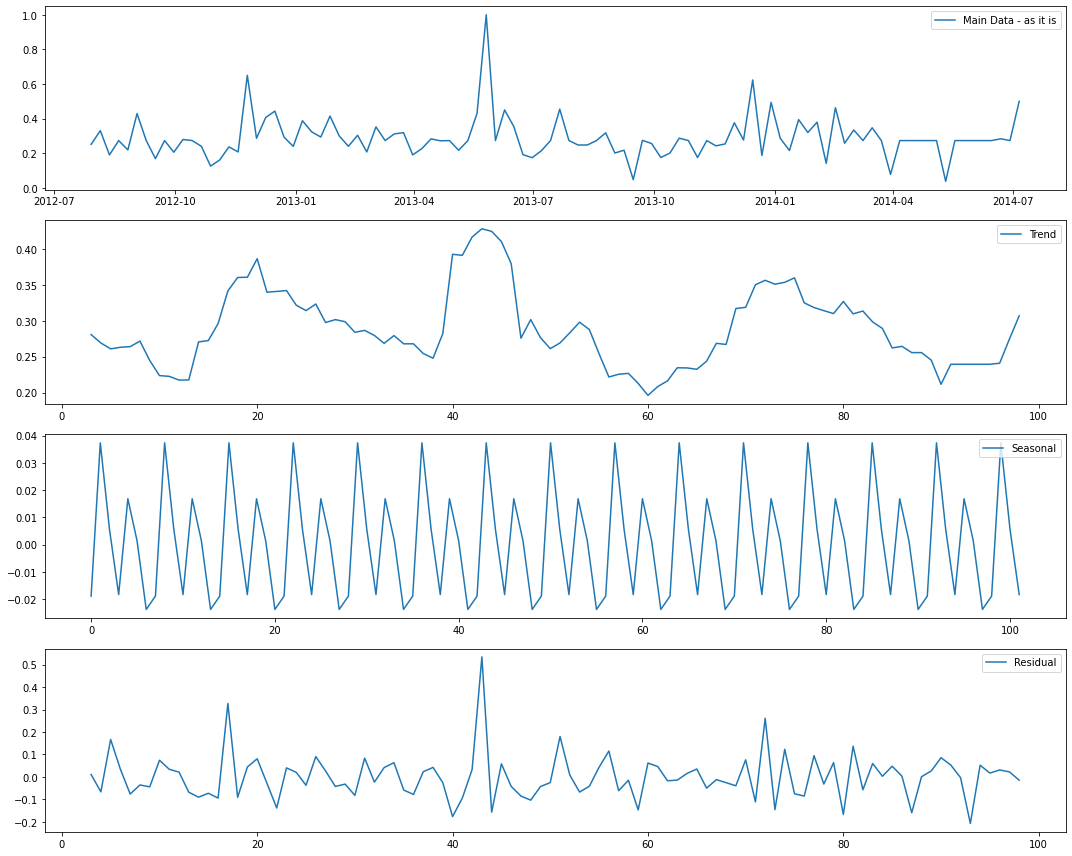

In [ ]:
# different components of the Time series data
# period = 7 since the data is weekly

decomposition=seasonal_decompose(np.asarray(toy_data_copy_df["reviewPolarity"]), period=7)  # colab
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(15,12))

# Original data
plt.subplot(411)
plt.plot(toy_data_copy_df["reviewPolarity"],label='Main Data - as it is')
plt.legend(loc='best')

# Trend
plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

# Residual
plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

# Plot all
plt.tight_layout()

We can see that the data has trend and seasonality.

In [ ]:
# check the data for stationarity(main data)
print(checkStationarity(train1))

p-value=3.003640857138772e-05. Data is stationary


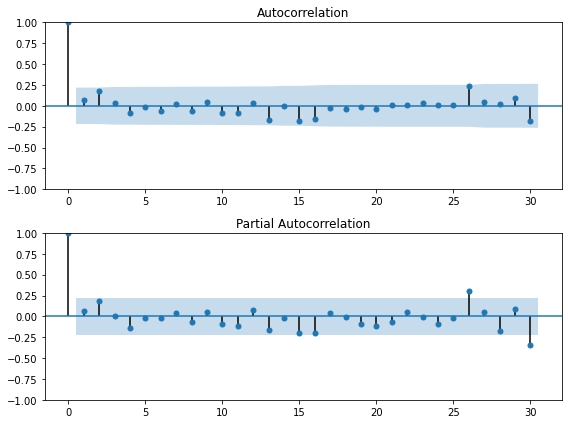

In [ ]:
# AutoCorrelation and partial AutoCorrelation plot
acf_pacf1(train1,30)

##### ARIMA Model


In [ ]:
# making dataframe for best p and q values by using AIC values 

import warnings
warnings.filterwarnings("ignore")

k = [];l = [];m = [];n = [];o =[];y=[];o=[]
for p in range(2,4):
    for q in range(3,5):
      for d in range(1,3):
        m1 = ARIMA(train1,order=(p,d,q)).fit()
        k.append (p)
        l.append (q)
        y.append (d)
        m.append (m1.aic)
        n.append (m1.bic)
        o.append (m1.hqic)

ii_df1 = pd.DataFrame({"p value":k,"d value":y,"q value":l,"AIC values":m,"BIC values":n,"HQIC values":o})

In [ ]:
# finding lowest values of AIC and show that row

ii_df1[ii_df1["AIC values"]==np.min(ii_df1["AIC values"])]

,p value,d value,q value,AIC values,BIC values,HQIC values
0,2,1,3,-90.300439,-76.008279,-84.570303


In [ ]:
# Arima Model where p,q and d
arima_model = ARIMA(train1,order=(2,1,3)).fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:         reviewPolarity   No. Observations:                   81
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  51.150
Date:                Thu, 05 Jan 2023   AIC                            -90.300
Time:                        10:29:53   BIC                            -76.008
Sample:                    07-29-2012   HQIC                           -84.570
                         - 02-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0205      0.567     -0.036      0.971      -1.131       1.090
ar.L2         -0.4287      0.660     -0.650      0.516      -1.722       0.864
ma.L1         -0.9115      0.650     -1.401      0.1

In [ ]:
# forecasts sales by using the Model

forecasts1 = arima_model.forecast(len(test1)) 
print(forecasts1)

2014-02-16    0.285555
2014-02-23    0.256925
2014-03-02    0.295174
2014-03-09    0.306663
2014-03-16    0.290029
2014-03-23    0.285444
2014-03-30    0.292670
2014-04-06    0.294487
2014-04-13    0.291352
2014-04-20    0.290637
2014-04-27    0.291996
2014-05-04    0.292275
2014-05-11    0.291687
2014-05-18    0.291579
2014-05-25    0.291834
2014-06-01    0.291874
2014-06-08    0.291765
2014-06-15    0.291749
2014-06-22    0.291797
2014-06-29    0.291802
2014-07-06    0.291782
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [ ]:
# actual vs predicted values

actual = []; forcast = []

for i in range(len(forecasts1)):
    actual.append(test1["reviewPolarity"][i])
    forcast.append(forecasts1[i])

df_res1 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test1.index)
df_res1['err'] = df_res1.actual - df_res1.forcasted
df_res1

,actual,forcasted,err
reviewTime,,,
2014-02-16,0.462949,0.285555,0.177394
2014-02-23,0.257500,0.256925,0.000575
2014-03-02,0.334091,0.295174,0.038917
2014-03-09,0.273038,0.306663,-0.033625
2014-03-16,0.346875,0.290029,0.056846
2014-03-23,0.273038,0.285444,-0.012406
2014-03-30,0.077588,0.292670,-0.215082
2014-04-06,0.273038,0.294487,-0.021449
2014-04-13,0.273038,0.291352,-0.018314


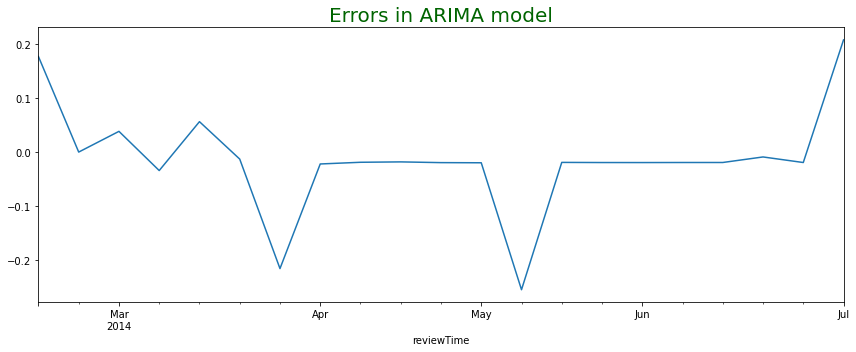

In [ ]:
# errors for ARIMA model(test)

fig,ax1 = plt.subplots(1,1,figsize=(12,5))
plt.title("Errors in ARIMA model",size = 20,color="darkgreen")
df_res1.err.plot(ax =ax1)
plt.show()

In [ ]:
# checking the model is good or bad 
test(arima_model)

Fail-to-Reject H0. Good model


In [ ]:
# calculating the errors(ARIMA) 
# low mse and rmse is good for the model

p=2;q=3;d=1
msg1 = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res1.actual, df_res1.forcasted)
print(msg1 + "\n\tMSE = {}\n\tRMSE = {}".format(round(mse1,2),round(np.sqrt(mse1),1)))

ARIMA Model. Order=(2,1,3)
	MSE = 0.01
	RMSE = 0.1


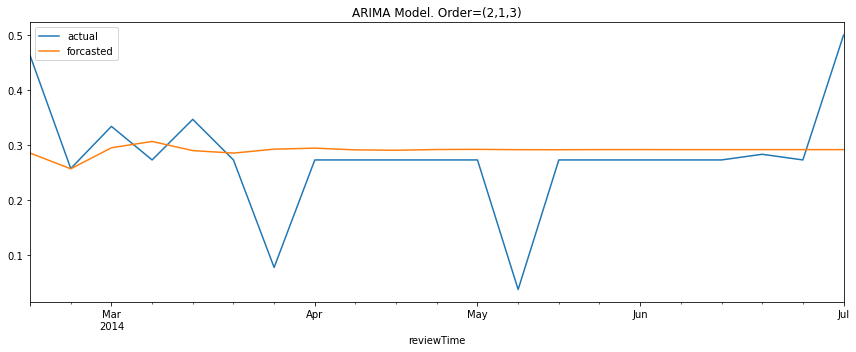

In [ ]:
# Plot actual vs. predicted values(test)

df_res1.actual.plot(figsize=(12,5),legend=True)
df_res1.forcasted.plot(legend=True)
plt.title(msg1)
plt.show()

Forecast for the model

In [ ]:
# Build final model (ARIMA)
arima_model2 = ARIMA(toy_data_copy_df["reviewPolarity"], order=(2,1,3)).fit()

In [ ]:
# Forecasting (ARIMA)

start =len(toy_data_copy_df)
stop= len(toy_data_copy_df)+52
# forecasted_values3 = arima_model2.forecast(36)
forecasted_values3 = arima_model2.predict(start,stop) 
print(forecasted_values3)

2014-07-13    0.258202
2014-07-20    0.325287
2014-07-27    0.259087
2014-08-03    0.305366
2014-08-10    0.290679
2014-08-17    0.272210
2014-08-24    0.315695
2014-08-31    0.261867
2014-09-07    0.309623
2014-09-14    0.281210
2014-09-21    0.283717
2014-09-28    0.305645
2014-10-05    0.267682
2014-10-12    0.309363
2014-10-19    0.276312
2014-10-26    0.291923
2014-11-02    0.296780
2014-11-09    0.274591
2014-11-16    0.306239
2014-11-23    0.275069
2014-11-30    0.296803
2014-12-07    0.289980
2014-12-14    0.281186
2014-12-21    0.301735
2014-12-28    0.276359
2015-01-04    0.298828
2015-01-11    0.285506
2015-01-18    0.286610
2015-01-25    0.297008
2015-02-01    0.279084
2015-02-08    0.298722
2015-02-15    0.283184
2015-02-22    0.290484
2015-03-01    0.292831
2015-03-08    0.282332
2015-03-15    0.297262
2015-03-22    0.282586
2015-03-29    0.292792
2015-04-05    0.289623
2015-04-12    0.285437
2015-04-19    0.295147
2015-04-26    0.283184
2015-05-03    0.293756
2015-05-10 

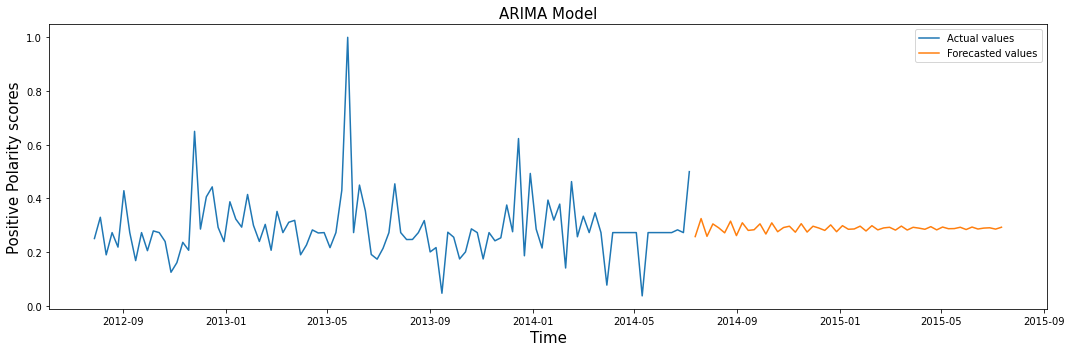

In [ ]:
# plotting given data and forecasted values (ARIMA model)

fig,ax1=plt.subplots(1,1,figsize=(15,5))
plt.plot(toy_data_copy_df["reviewPolarity"],label="Actual values")
plt.plot(forecasted_values3,label="Forecasted values")
plt.ylabel("Positive Polarity scores",size = 15)
plt.xlabel("Time",size = 15)
plt.title("ARIMA Model",size=15)
plt.legend()
plt.show()

##### SARIMA Model

In [ ]:
# build model (sarima model)

sarima_model = SARIMAX(train1, order=(1,1,3), seasonal_order=(2,1,3,7)).fit()

In [ ]:
# forecasts sales by using the Model

forecasts2 = sarima_model.forecast(len(test1))
print(forecasts2)

2014-02-16    0.321018
2014-02-23    0.241273
2014-03-02    0.226123
2014-03-09    0.311071
2014-03-16    0.301751
2014-03-23    0.397655
2014-03-30    0.176492
2014-04-06    0.339773
2014-04-13    0.253360
2014-04-20    0.227535
2014-04-27    0.335309
2014-05-04    0.317070
2014-05-11    0.405539
2014-05-18    0.177558
2014-05-25    0.353580
2014-06-01    0.258576
2014-06-08    0.228184
2014-06-15    0.329731
2014-06-22    0.297827
2014-06-29    0.412119
2014-07-06    0.166805
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [ ]:
# actual vs predicted values

actual = []; forcast = []

for i in range(len(forecasts2)):
    actual.append(test1["reviewPolarity"][i])
    forcast.append(forecasts2[i])

df_res2 = pd.DataFrame({'actual':actual, 'forcasted':forcast},index =test1.index)
df_res2['err'] = df_res2.actual - df_res2.forcasted
print(df_res2)

              actual  forcasted       err
reviewTime                               
2014-02-16  0.462949   0.321018  0.141932
2014-02-23  0.257500   0.241273  0.016227
2014-03-02  0.334091   0.226123  0.107968
2014-03-09  0.273038   0.311071 -0.038032
2014-03-16  0.346875   0.301751  0.045124
2014-03-23  0.273038   0.397655 -0.124616
2014-03-30  0.077588   0.176492 -0.098904
2014-04-06  0.273038   0.339773 -0.066735
2014-04-13  0.273038   0.253360  0.019679
2014-04-20  0.273038   0.227535  0.045503
2014-04-27  0.273038   0.335309 -0.062271
2014-05-04  0.273038   0.317070 -0.044032
2014-05-11  0.037500   0.405539 -0.368039
2014-05-18  0.273038   0.177558  0.095480
2014-05-25  0.273038   0.353580 -0.080542
2014-06-01  0.273038   0.258576  0.014462
2014-06-08  0.273038   0.228184  0.044854
2014-06-15  0.273038   0.329731 -0.056692
2014-06-22  0.283333   0.297827 -0.014494
2014-06-29  0.273038   0.412119 -0.139080
2014-07-06  0.500000   0.166805  0.333195


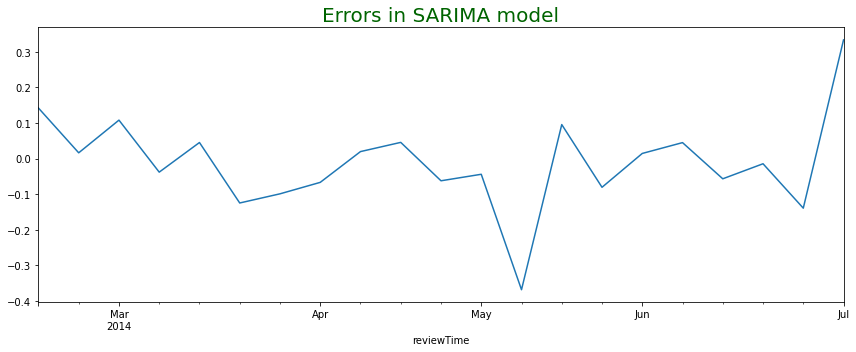

In [ ]:
# errors for SARIMA model(test)

fig,ax1 = plt.subplots(1,1,figsize=(12,5))
plt.title("Errors in SARIMA model",size = 20,color="darkgreen")
df_res2.err.plot(ax =ax1)
plt.show()

In [ ]:
# checking the model is good or bad 
test(sarima_model)

Fail-to-Reject H0. Good model


In [ ]:
 # calculating the errors(SARIMA) 
# low mse and rmse is good for the model

p=2;q=3;d=1
msg2 = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse2 = mean_squared_error(df_res2.actual, df_res2.forcasted)
print(msg2 + "\n\tMSE = {}\n\tRMSE = {}".format(round(mse2,2),round(np.sqrt(mse2),1)))

SARIMA Model. Order=(2,1,3)
	MSE = 0.02
	RMSE = 0.1


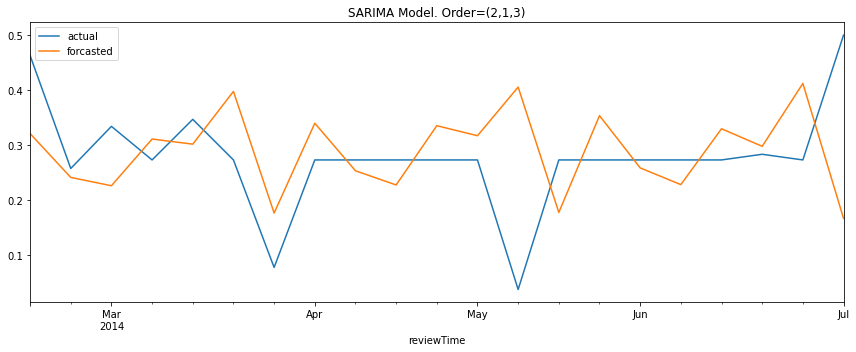

In [ ]:
# Plot actual vs. predicted values(test)

df_res2.actual.plot(figsize=(12,5),legend=True)
df_res2.forcasted.plot(legend=True)
plt.title(msg2)
plt.show()

In [ ]:
# Forecasting the values
stop= len(test1)
forecasted_values2 = sarima_model.forecast(stop)
print(forecasted_values2)

2014-02-16    0.321018
2014-02-23    0.241273
2014-03-02    0.226123
2014-03-09    0.311071
2014-03-16    0.301751
2014-03-23    0.397655
2014-03-30    0.176492
2014-04-06    0.339773
2014-04-13    0.253360
2014-04-20    0.227535
2014-04-27    0.335309
2014-05-04    0.317070
2014-05-11    0.405539
2014-05-18    0.177558
2014-05-25    0.353580
2014-06-01    0.258576
2014-06-08    0.228184
2014-06-15    0.329731
2014-06-22    0.297827
2014-06-29    0.412119
2014-07-06    0.166805
Freq: W-SUN, Name: predicted_mean, dtype: float64


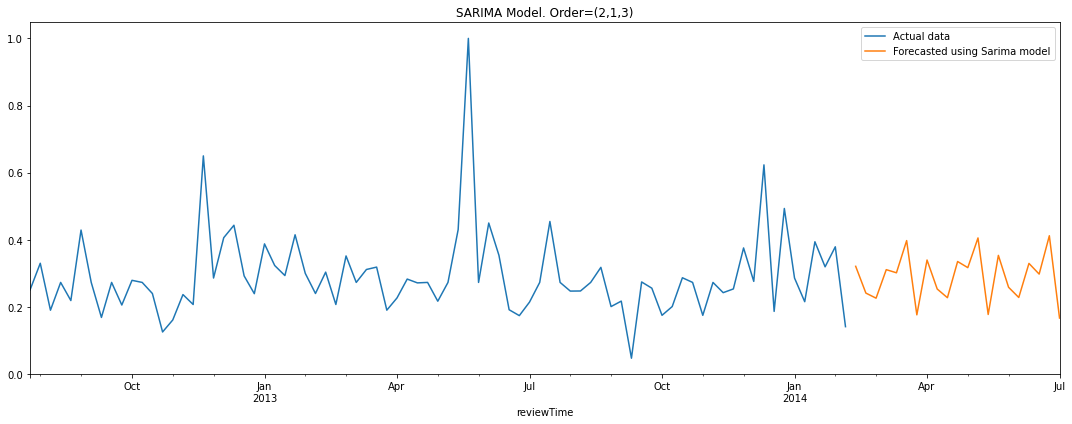

In [ ]:
# plotting given data and forecasted values

train1["reviewPolarity"].plot(figsize=(15,6),label="Actual data")
forecasted_values2.plot(label="Forecasted using Sarima model")
plt.legend()
plt.title(msg2)
plt.show()

###### Forecasting for Toy Data

In [ ]:
# Build final model (Sarima)
sarima_model2 = SARIMAX(toy_data_copy_df["reviewPolarity"], order=(1,1,3), seasonal_order=(2,1,3,7)).fit()


In [ ]:
# Forecasting 

stop= 52
forecasted_values1 = sarima_model2.forecast(stop)
print(forecasted_values1)

2014-07-13    0.317471
2014-07-20    0.283883
2014-07-27    0.269933
2014-08-03    0.280790
2014-08-10    0.318453
2014-08-17    0.324460
2014-08-24    0.304735
2014-08-31    0.311953
2014-09-07    0.306266
2014-09-14    0.254354
2014-09-21    0.255081
2014-09-28    0.266607
2014-10-05    0.270157
2014-10-12    0.218592
2014-10-19    0.290913
2014-10-26    0.268721
2014-11-02    0.257106
2014-11-09    0.240076
2014-11-16    0.336995
2014-11-23    0.232770
2014-11-30    0.276188
2014-12-07    0.278093
2014-12-14    0.273438
2014-12-21    0.250347
2014-12-28    0.283953
2015-01-04    0.349519
2015-01-11    0.307665
2015-01-18    0.324016
2015-01-25    0.316038
2015-02-01    0.288334
2015-02-08    0.264283
2015-02-15    0.269695
2015-02-22    0.295730
2015-03-01    0.307841
2015-03-08    0.273790
2015-03-15    0.302055
2015-03-22    0.294145
2015-03-29    0.250468
2015-04-05    0.245083
2015-04-12    0.279481
2015-04-19    0.250711
2015-04-26    0.224345
2015-05-03    0.282012
2015-05-10 

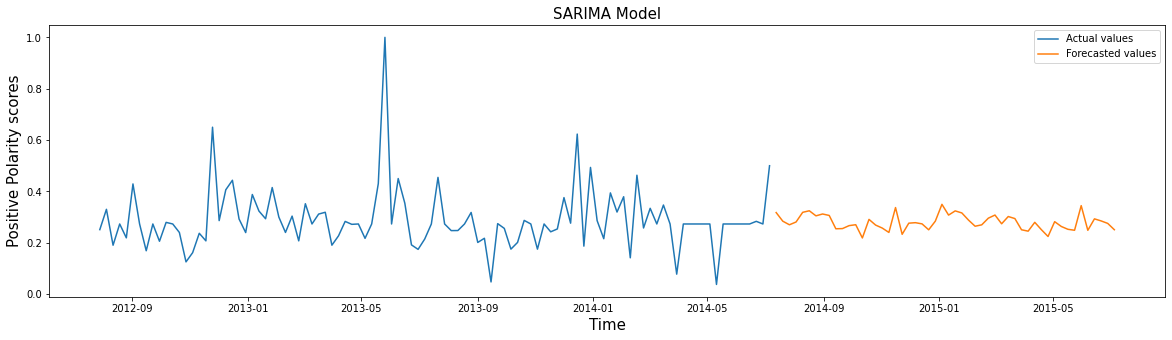

In [ ]:
 # plotting given data and forecasted values
 
fig,ax1=plt.subplots(1,1,figsize=(20,5))
plt.plot(toy_data_copy_df["reviewPolarity"],label="Actual values")
plt.plot(forecasted_values1,label="Forecasted values")
plt.ylabel("Positive Polarity scores",size = 15)
plt.xlabel("Time",size = 15)
plt.title("SARIMA Model",size=15)
plt.legend()
plt.show()


### Evaluations

Video_data

In [ ]:
# Build final model (Arima and Sarima)
arima_model1 = ARIMA(video_data_copy_df["reviewPolarity"], order=(2,1,3)).fit()
sarima_model1 = SARIMAX(video_data_copy_df["reviewPolarity"], order=(2,1,3), seasonal_order=(2,1,3,7)).fit()

# Forecasting 
stop= 52
forecasted_values1 = arima_model1.forecast(stop)
forecasted_values2 = sarima_model1.forecast(stop)

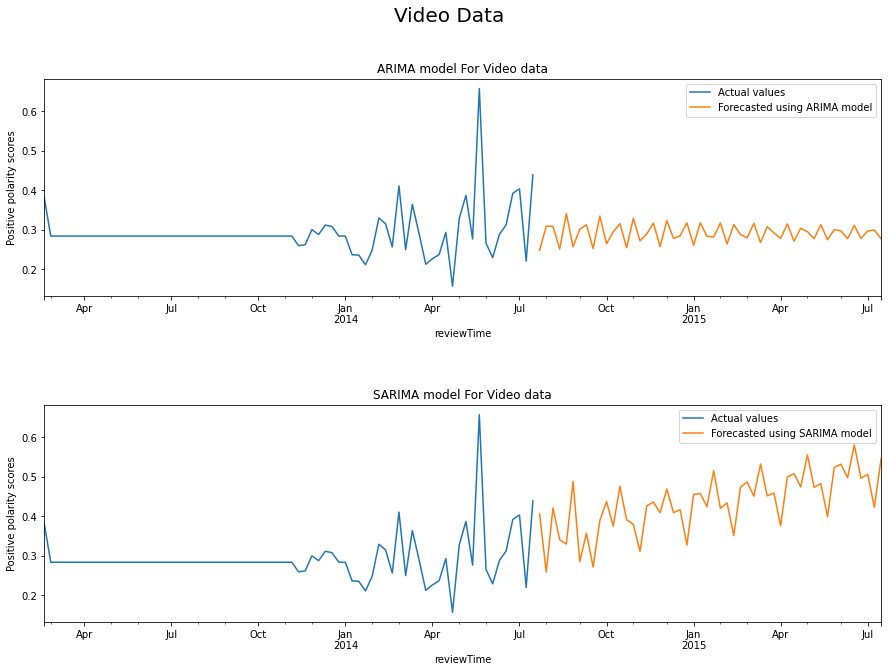

In [ ]:
# plotting the actual - predicted 

plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

ax = plt.GridSpec(2, 2)
ax.update(wspace=0.5, hspace=0.5)

ax1 = plt.subplot(ax[0, :])
ax2 = plt.subplot(ax[1, :])

video_data_copy_df["reviewPolarity"].plot(label="Actual values",ax=ax1)
forecasted_values1.plot(ax=ax1,label="Forecasted using ARIMA model")
ax1.set_title("ARIMA model For Video data")
ax1.set_ylabel("Positive polarity scores")
ax1.legend()

video_data_copy_df["reviewPolarity"].plot(label="Actual values",ax=ax2)
forecasted_values2.plot(ax=ax2,label="Forecasted using SARIMA model")
ax2.set_title("SARIMA model For Video data")
ax2.set_ylabel("Positive polarity scores")
ax2.legend()
plt.suptitle("Video Data",size=20)
plt.show()

We can see that in sarima model gives us best result . So we can use it for future buisness purpose to forecast furniture Customer ratings in future for video data.
 (the actual and forecasted values are similar)

Toy_data

In [ ]:
# Build final model (Arima and Sarima)
arima_model2 = ARIMA(toy_data_copy_df["reviewPolarity"], order=(2,1,3)).fit()
sarima_model2 = SARIMAX(toy_data_copy_df["reviewPolarity"], order=(1,1,3), seasonal_order=(2,1,3,7)).fit()

# Forecasting 
stop= 52
forecasted_values1 = arima_model2.forecast(stop)
forecasted_values2 = sarima_model2.forecast(stop)

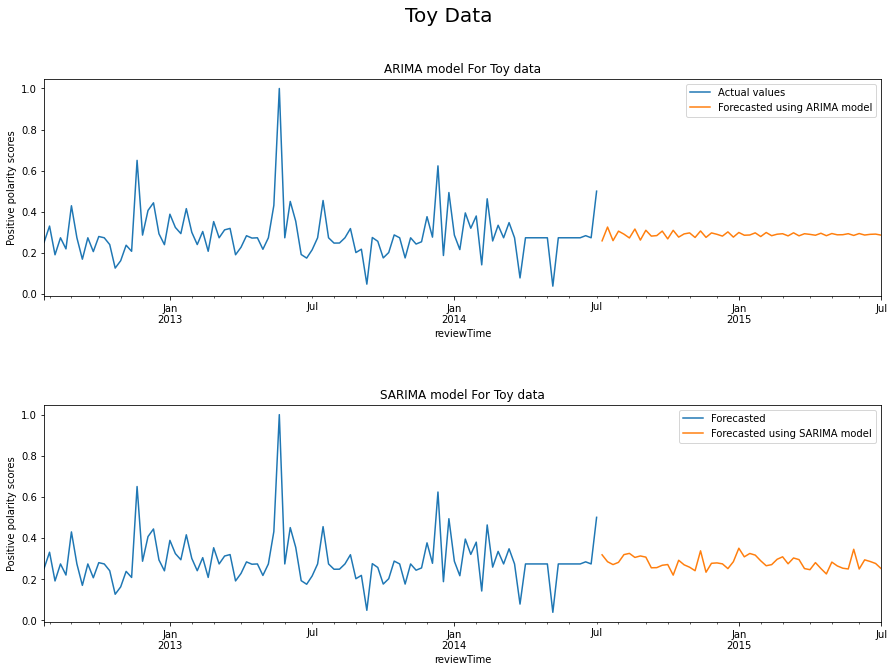

In [ ]:
# plotting the actual - predicted

plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

ax = plt.GridSpec(2, 2)
ax.update(wspace=0.5, hspace=0.5)

ax1 = plt.subplot(ax[0, :])
ax2 = plt.subplot(ax[1, :])

toy_data_copy_df["reviewPolarity"].plot(label="Actual values",ax=ax1)
forecasted_values1.plot(ax=ax1,label="Forecasted using ARIMA model")
ax1.set_title("ARIMA model For Toy data")
ax1.set_ylabel("Positive polarity scores")
ax1.legend()

toy_data_copy_df["reviewPolarity"].plot(label="Forecasted",ax=ax2)
forecasted_values2.plot(ax=ax2,label="Forecasted using SARIMA model")
ax2.set_title("SARIMA model For Toy data")
ax2.set_ylabel("Positive polarity scores")
ax2.legend()
plt.suptitle("Toy Data",size=20)
plt.show()

We can see that in sarima model gives us best result . So we can use it for future buisness purpose to forecast furniture Customer reviews in future for toy data.
 (the actual and forecasted values are similar)